# ESCMID Workshop - Day 1: Data Cleaning and Preparation

## Overview
This notebook demonstrates essential data cleaning and preparation techniques for antimicrobial resistance (AMR) surveillance data. We'll work with synthetic microbiological data to showcase best practices in data preprocessing, quality assessment, and preparation for both exploratory data analysis and machine learning applications.

## Learning Objectives
By the end of this notebook, you will understand how to:
- Assess data quality and identify common issues in microbiological datasets
- Handle missing values appropriately based on domain knowledge
- Remove or handle duplicate records
- Prepare categorical data for analysis
- Export cleaned data for downstream analysis

## Dataset Description
The synthetic dataset contains microbiological surveillance data with the following key components:
- **Demographic information**: Patient demographics, healthcare settings
- **Microbiological data**: Species identification, antimicrobial susceptibility results
- **Metadata**: Study information, temporal data, geographic data

---

## 1. Environment Setup and Data Loading

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

### Setting up the Environment
First, we import the necessary libraries for data manipulation, visualization, and analysis.

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')
# PATH = '/content/drive/MyDrive/ESCMID_workshop/data'
# os.listdir(PATH)

### Data Loading and Initial Inspection
We load the synthetic microbiological dataset and perform an initial inspection to understand its structure and content.

**Key considerations when loading microbiological data:**
- Use `low_memory=False` for datasets with mixed data types
- Always inspect the first few rows to understand data structure
- Check dataset dimensions to understand scope

In [42]:
PATH = '../DATA'
# Load the dataset
file_path = f'{PATH}/Synthetic_data.csv'
data = pd.read_csv(file_path,low_memory=False)

# Display first few rows to inspect data
data.head()


,Study,Species,Family,Country,State,Gender,Age.Group,Speciality,Source,In...Out.Patient,...,DHA,FOX,ACTMIR,KPC,OXA,NDM,IMP,VIM,SPM,GIM
0,C,Staphylococcus aureus,Staphylococcus spp,Z1,NaN,Female,19 to 64 Years,Medicine ICU,Sputum,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Haemophilus influenzae,Haemophilus spp,Z7,Y3,Female,85 and Over,Emergency Room,Sputum,Inpatient,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Klebsiella oxytoca,Enterobacteriaceae,Z3,NaN,Male,19 to 64 Years,Surgery General,Sputum,Inpatient,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C,Escherichia coli,Enterobacterales,Z24,NaN,Male,65 to 84 Years,Emergency Room,Urine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C,Acinetobacter baumannii,Non-Enterobacteriaceae,Z11,NaN,Male,65 to 84 Years,Medicine General,Urine,None Given,...,NaN,NaN,NaN,NEG,NaN,NEG,NaN,NaN,NEG,NaN


In [43]:
len(data.columns)

133

---

## 2. Data Quality Assessment

### Understanding Missing Data Patterns
Missing data is common in microbiological surveillance datasets and can occur for various reasons:
- **Technical reasons**: Laboratory testing not performed, equipment failure
- **Clinical reasons**: Patient factors, sample collection issues
- **Administrative reasons**: Data entry errors, incomplete records

The approach to handling missing data depends on:
1. **Why the data is missing** (mechanism)
2. **How much data is missing** (quantity)
3. **Which variables are affected** (pattern)
4. **The intended use of the data** (analysis goals)

### Creating a Missing Values Assessment Function
This function helps us systematically identify and quantify missing data across all variables in our dataset.

In [44]:
# What do we want to do with this dataset?
"""
- Visual inspection to get a "feel" for the dataset is always a good idea
- Think about missing values. Why are they missing? How should we handle this?
- Data preparation and clearning for visualisation and exploratory data analysis looks different when compared with preparation for machine learning
"""

'\n- Visual inspection to get a "feel" for the dataset is always a good idea\n- Think about missing values. Why are they missing? How should we handle this?\n- Data preparation and clearning for visualisation and exploratory data analysis looks different when compared with preparation for machine learning\n'

---

## 3. Data Cleaning Strategy

### Column-by-Column Analysis Approach
When cleaning microbiological data, it's essential to consider each variable individually based on:
- **Clinical significance**: How important is this variable for analysis?
- **Missing data mechanism**: Why might this data be missing?
- **Domain knowledge**: What are reasonable approaches for this type of data?

### Handling Gender Missing Values
For demographic variables like gender, missing values often represent:
- Data entry errors
- Patient privacy concerns
- Administrative oversight

**Decision**: Remove rows with missing gender as this represents a small percentage (3.50%) and gender may be important for epidemiological analysis.

In [45]:
# showing missingness of each column as a dataframe
def missing_values_table(df):
    # Total missing values
    missing_count = df.isnull().sum()

    # Percentage of missing values
    missing_percent = 100 * df.isnull().sum() / len(df)

    # Combine into a single DataFrame
    missing_table = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percent
    })

    # Filter to show only columns with missing data
    missing_table = missing_table[missing_table['Missing Values'] > 0]

    # Sort by percentage of missing values
    missing_table = missing_table.sort_values(by='Percentage (%)', ascending=False)

    return missing_table

# Example usage
missing_data_df = missing_values_table(data)
for index, row in missing_data_df.iterrows():
    print(f"Column: {index}, Missing Values: {row['Missing Values']}, Percentage: {row['Percentage (%)']:.2f}%")


Column: Aztreonam.avibactam_I, Missing Values: 9984.0, Percentage: 100.00%
Column: Cefoperazone.sulbactam_I, Missing Values: 9984.0, Percentage: 100.00%
Column: Gatifloxacin_I, Missing Values: 9984.0, Percentage: 100.00%
Column: Ceftaroline.avibactam_I, Missing Values: 9984.0, Percentage: 100.00%
Column: Tebipenem_I, Missing Values: 9984.0, Percentage: 100.00%
Column: Tetracycline_I, Missing Values: 9984.0, Percentage: 100.00%
Column: Sulbactam_I, Missing Values: 9984.0, Percentage: 100.00%
Column: Ceftibuten.avibactam_I, Missing Values: 9984.0, Percentage: 100.00%
Column: Tetracycline, Missing Values: 9983.0, Percentage: 99.99%
Column: Gatifloxacin, Missing Values: 9982.0, Percentage: 99.98%
Column: Quinupristin.dalfopristin, Missing Values: 9946.0, Percentage: 99.62%
Column: Quinupristin.dalfopristin_I, Missing Values: 9936.0, Percentage: 99.52%
Column: Sulbactam, Missing Values: 9915.0, Percentage: 99.31%
Column: Cefoxitin_I, Missing Values: 9906.0, Percentage: 99.22%
Column: Cefoxi

### Validating Data Removal
Always verify that data manipulation operations worked as expected by checking the counts.

In [46]:
# We can break down this task by thinking about each column individually. How should we handle each one individually

# For this example, lets first remove any rows where gender is missing. From the previous cell, we can see that gender is missing in 349 cases (3.50%).

### Focusing on Core Demographics
After removing gender missing values, we focus on key demographic variables that are essential for epidemiological analysis of AMR data.

In [47]:
# remove rows where Gender is missing
len_df_before_remove = len(data)
data = data.dropna(subset=['Gender'])
len_df_after_remove = len(data)
print(f"Rows removed: {len_df_before_remove - len_df_after_remove}")

Rows removed: 349


### Handling Geographic Variables
**State/Province data considerations:**
- High missingness in geographic data is common in multi-national surveillance
- May represent privacy concerns or data collection limitations
- For analysis focusing on species and resistance patterns, state-level detail may not be essential

**Decision**: Remove the State column due to high missingness and limited analytical value for our current objectives.

In [48]:
# Great, this lines up with what was expected.

In [49]:
# Lets revist the missing data values but looking only at the demographics column
demographic_columns = [
    'Study',
    'Species',
    'Family',
    'Country',
    'State',
    'Gender',
    'Age.Group',
    'Speciality',
    'Source',
    'In...Out.Patient',
    'Year'
]

data_demographics = data[demographic_columns]
missing_data_df = missing_values_table(data_demographics)
print(missing_data_df)

                  Missing Values  Percentage (%)
State                       8174       84.836533
In...Out.Patient            2479       25.729113


### Handling Healthcare Setting Information
The "In...Out.Patient" column contains information about healthcare settings, which is crucial for AMR epidemiology as resistance patterns often differ between inpatient and outpatient settings.

In [50]:
# Given that the state column has many NA entries, we will remove this column from our dataset
data = data.drop(columns=['State'])

**Approach**: Since "None Given" already exists as a category, we'll treat missing values the same way to maintain consistency in the dataset.

In [51]:
data.head()

,Study,Species,Family,Country,Gender,Age.Group,Speciality,Source,In...Out.Patient,Year,...,DHA,FOX,ACTMIR,KPC,OXA,NDM,IMP,VIM,SPM,GIM
0,C,Staphylococcus aureus,Staphylococcus spp,Z1,Female,19 to 64 Years,Medicine ICU,Sputum,NaN,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Haemophilus influenzae,Haemophilus spp,Z7,Female,85 and Over,Emergency Room,Sputum,Inpatient,2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Klebsiella oxytoca,Enterobacteriaceae,Z3,Male,19 to 64 Years,Surgery General,Sputum,Inpatient,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C,Escherichia coli,Enterobacterales,Z24,Male,65 to 84 Years,Emergency Room,Urine,NaN,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C,Acinetobacter baumannii,Non-Enterobacteriaceae,Z11,Male,65 to 84 Years,Medicine General,Urine,None Given,2020,...,NaN,NaN,NaN,NEG,NaN,NEG,NaN,NaN,NEG,NaN


In [52]:
# Revisting the In...Out.Patient column, we need to handle the missing values here.
# Checking the different values already in the column
data['In...Out.Patient'].unique()

array([nan, 'Inpatient', 'None Given', 'Outpatient', 'Other'],
      dtype=object)

---

## 4. Data Quality Validation

### Checking for Duplicate Records
Duplicate records can arise from:
- Multiple sample submissions from the same patient
- Data entry errors
- System errors during data collection

**Important**: In microbiological data, what appears to be a "duplicate" might actually represent:
- Multiple isolates from the same patient (clinically relevant)
- Follow-up samples (temporal tracking)
- Different antimicrobial testing results

Always consider the clinical context before removing apparent duplicates.

In [53]:
# Lets treat the missing values the same as the "None Given" option. So we will replace the missing values
# with 'None Given'
data['In...Out.Patient'] = data['In...Out.Patient'].fillna('None Given')

---

## 5. Data Preparation for Machine Learning

### Considerations for ML Preprocessing
When preparing microbiological data for machine learning applications, several additional considerations apply:

**Categorical Variables**: Most ML algorithms require numerical inputs, so categorical variables need encoding:
- **Label Encoding**: For ordinal relationships (e.g., age groups)
- **One-Hot Encoding**: For nominal categories (e.g., species, antibiotics)
- **Target Encoding**: For high-cardinality categorical variables

**Feature Selection**: 
- Remove variables with high missingness
- Consider clinical relevance of features
- Handle multi-collinearity between related variables

**Data Types**:
- Ensure consistent data types across features
- Handle mixed-type columns appropriately
- Consider scaling requirements for different algorithms

In [54]:
# We can see the nan values have been successfully removed.
data['In...Out.Patient'].unique()

array(['None Given', 'Inpatient', 'Outpatient', 'Other'], dtype=object)

In [55]:
# Check for duplicate records
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

Number of duplicate records: 0


---

## 6. Exploratory Data Analysis

### Visualizing Cleaned Data
After cleaning, it's important to visualize the data to:
- Verify cleaning steps were successful
- Understand data distributions
- Identify potential biases or patterns
- Inform subsequent analysis decisions

The following visualizations help us understand key patterns in our AMR surveillance data:

In [56]:
# Great! no need to remove duplicate records. This should always be checked.

# Say we want to prepare our data for a machine learning task of predicting Amikacin susceptibility. How would we prepare our data for this considering
# that data needs to be numerical for ML models

### Interpretation of Visualizations

**Age Group Distribution**: 
- Shows the demographic distribution of patients in our dataset
- Important for understanding potential age-related resistance patterns
- May reveal sampling biases in data collection

**Gender Distribution**: 
- After removing missing values, shows the gender balance in our dataset
- Relevant for epidemiological analysis as some infections show gender preferences

**Species Distribution**: 
- Reveals the most common pathogens in our surveillance system
- Top species often reflect both clinical importance and ease of identification
- Important for prioritizing resistance surveillance efforts

**Specialty Distribution**: 
- Shows which medical specialties contribute most isolates
- Reflects both infection patterns and testing practices
- Important for understanding potential selection biases in surveillance data

In [57]:
data.head()

,Study,Species,Family,Country,Gender,Age.Group,Speciality,Source,In...Out.Patient,Year,...,DHA,FOX,ACTMIR,KPC,OXA,NDM,IMP,VIM,SPM,GIM
0,C,Staphylococcus aureus,Staphylococcus spp,Z1,Female,19 to 64 Years,Medicine ICU,Sputum,None Given,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Haemophilus influenzae,Haemophilus spp,Z7,Female,85 and Over,Emergency Room,Sputum,Inpatient,2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Klebsiella oxytoca,Enterobacteriaceae,Z3,Male,19 to 64 Years,Surgery General,Sputum,Inpatient,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C,Escherichia coli,Enterobacterales,Z24,Male,65 to 84 Years,Emergency Room,Urine,None Given,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C,Acinetobacter baumannii,Non-Enterobacteriaceae,Z11,Male,65 to 84 Years,Medicine General,Urine,None Given,2020,...,NaN,NaN,NaN,NEG,NaN,NEG,NaN,NaN,NEG,NaN


---

## 7. Data Export and Next Steps

### Exporting Cleaned Data
After completing our data cleaning process, we export the cleaned dataset for use in subsequent analyses. This ensures:
- Consistency across different analysis workflows
- Reproducibility of results
- Separation of data cleaning from analysis steps

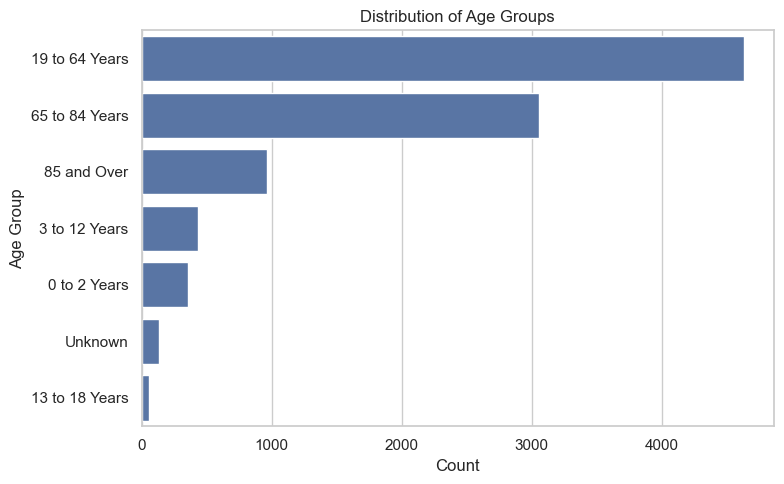

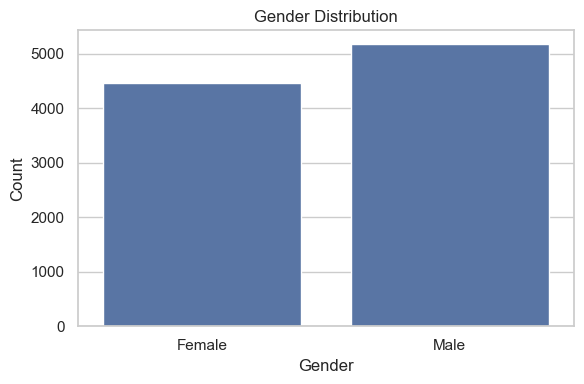

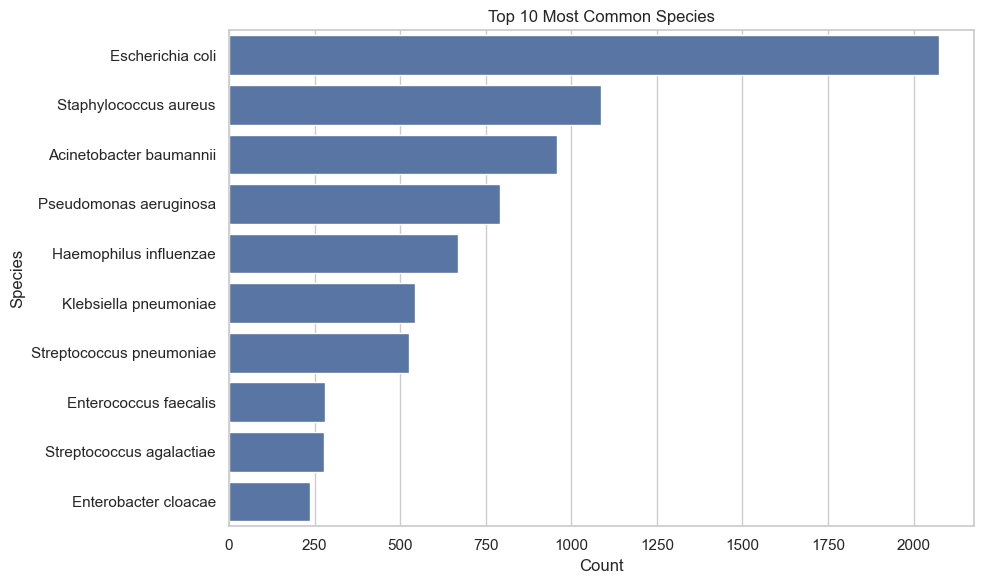

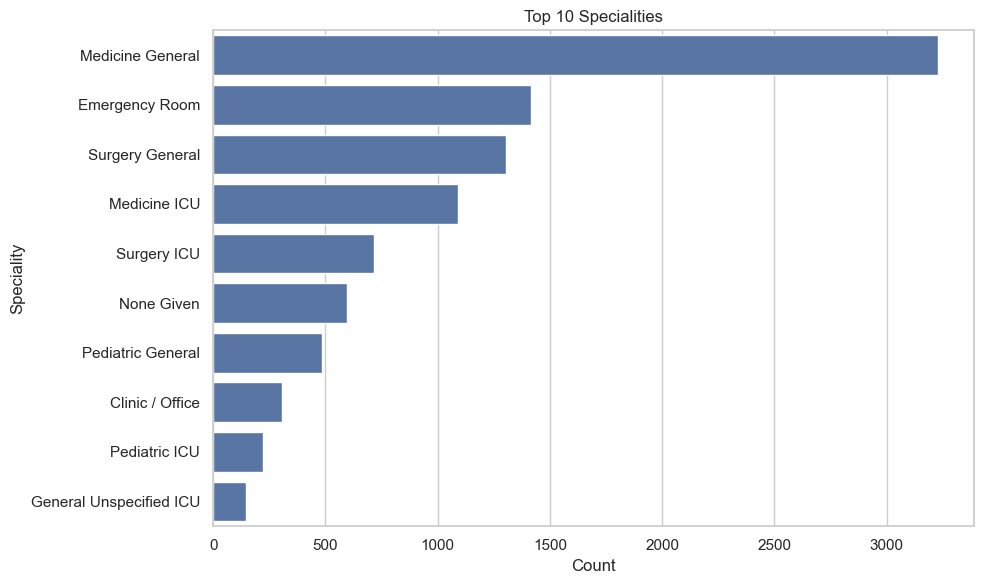

In [58]:
# Visualising some aspects of our final dataset

# Ensure plots are clean and readable
sns.set(style="whitegrid")


# Distribution of Age Groups
plt.figure(figsize=(8, 5))
sns.countplot(y='Age.Group', data=data, order=data['Age.Group'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

# Distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Top 10 most common species
plt.figure(figsize=(10, 6))
sns.countplot(y='Species', data=data, order=data['Species'].value_counts().head(10).index)
plt.title('Top 10 Most Common Species')
plt.xlabel('Count')
plt.ylabel('Species')
plt.tight_layout()
plt.show()

# Top 10 Specialities
plt.figure(figsize=(10, 6))
sns.countplot(y='Speciality', data=data, order=data['Speciality'].value_counts().head(10).index)
plt.title('Top 10 Specialities')
plt.xlabel('Count')
plt.ylabel('Speciality')
plt.tight_layout()
plt.show()

In [59]:
# Export our cleaned data for machine learning
export_file_path = f'{PATH}/Synthetic_Data_cleaned.csv'
data.to_csv(export_file_path, index=False)

---

## Summary and Key Takeaways

### Data Cleaning Decisions Made:
1. **Removed rows with missing gender** (349 rows, 3.50%) - small percentage, important demographic variable
2. **Dropped State column** - high missingness, limited analytical value for current objectives  
3. **Filled missing healthcare setting values** with "None Given" - maintains consistency with existing categories
4. **Verified no duplicate records** - important quality check for surveillance data

### Best Practices Applied:
- **Systematic assessment** of missing data patterns
- **Domain-informed decisions** based on microbiological and epidemiological knowledge
- **Documentation of rationale** for each cleaning step
- **Validation** of data manipulation operations
- **Visualization** to verify cleaning results

### Next Steps:
This cleaned dataset is now ready for:
- **Machine learning applications** (with appropriate encoding of categorical variables)
- **Statistical analysis** of resistance patterns
- **Epidemiological investigations** 
- **Visualization and reporting**

### Data Quality Metrics:
- **Final dataset size**: Check the dimensions of the cleaned dataset
- **Missing data**: Minimal remaining missing values in key variables
- **Data consistency**: Standardized categories and formats
- **Duplicate records**: Zero confirmed duplicates